## Case study

As in many databases, Mexico government just give information of confirmed cases and deaths. Recovered cases are estimated as those who survived after 2 weeks. We also estimated the susceptible ones as the total population minus the confirmed, and the active cases as confirmed minus recovered minus deaths. We develop a piece of software in order to process the data, simulate the dynamics of the epidemics and view the behavior of the rates. For those interested in going deeper into the details, [visit our GitHub repository](https://github.com/julihocc/covid19-forecasting).



In [1]:
from epydemics import data_processing
from epydemics import modeling
from epydemics import visualization

from epydemics.modeling import ratios

In [2]:
data = data_processing.process_data(
    "Mexico",
    total_population = 130_000_000,
    window = 7,
    local_file="owid-covid-data.csv",
    since="2020-03-01",
    until="2020-12-31"
)

2020-03-01 00:00:00


f:\jcc30986@gmail.com\Sandbox\covid19-forecasting\covid_analysis\epydemics\data_processing.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, "date"] = pd.to_datetime(data["date"]).values.astype("datetime64[D]")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


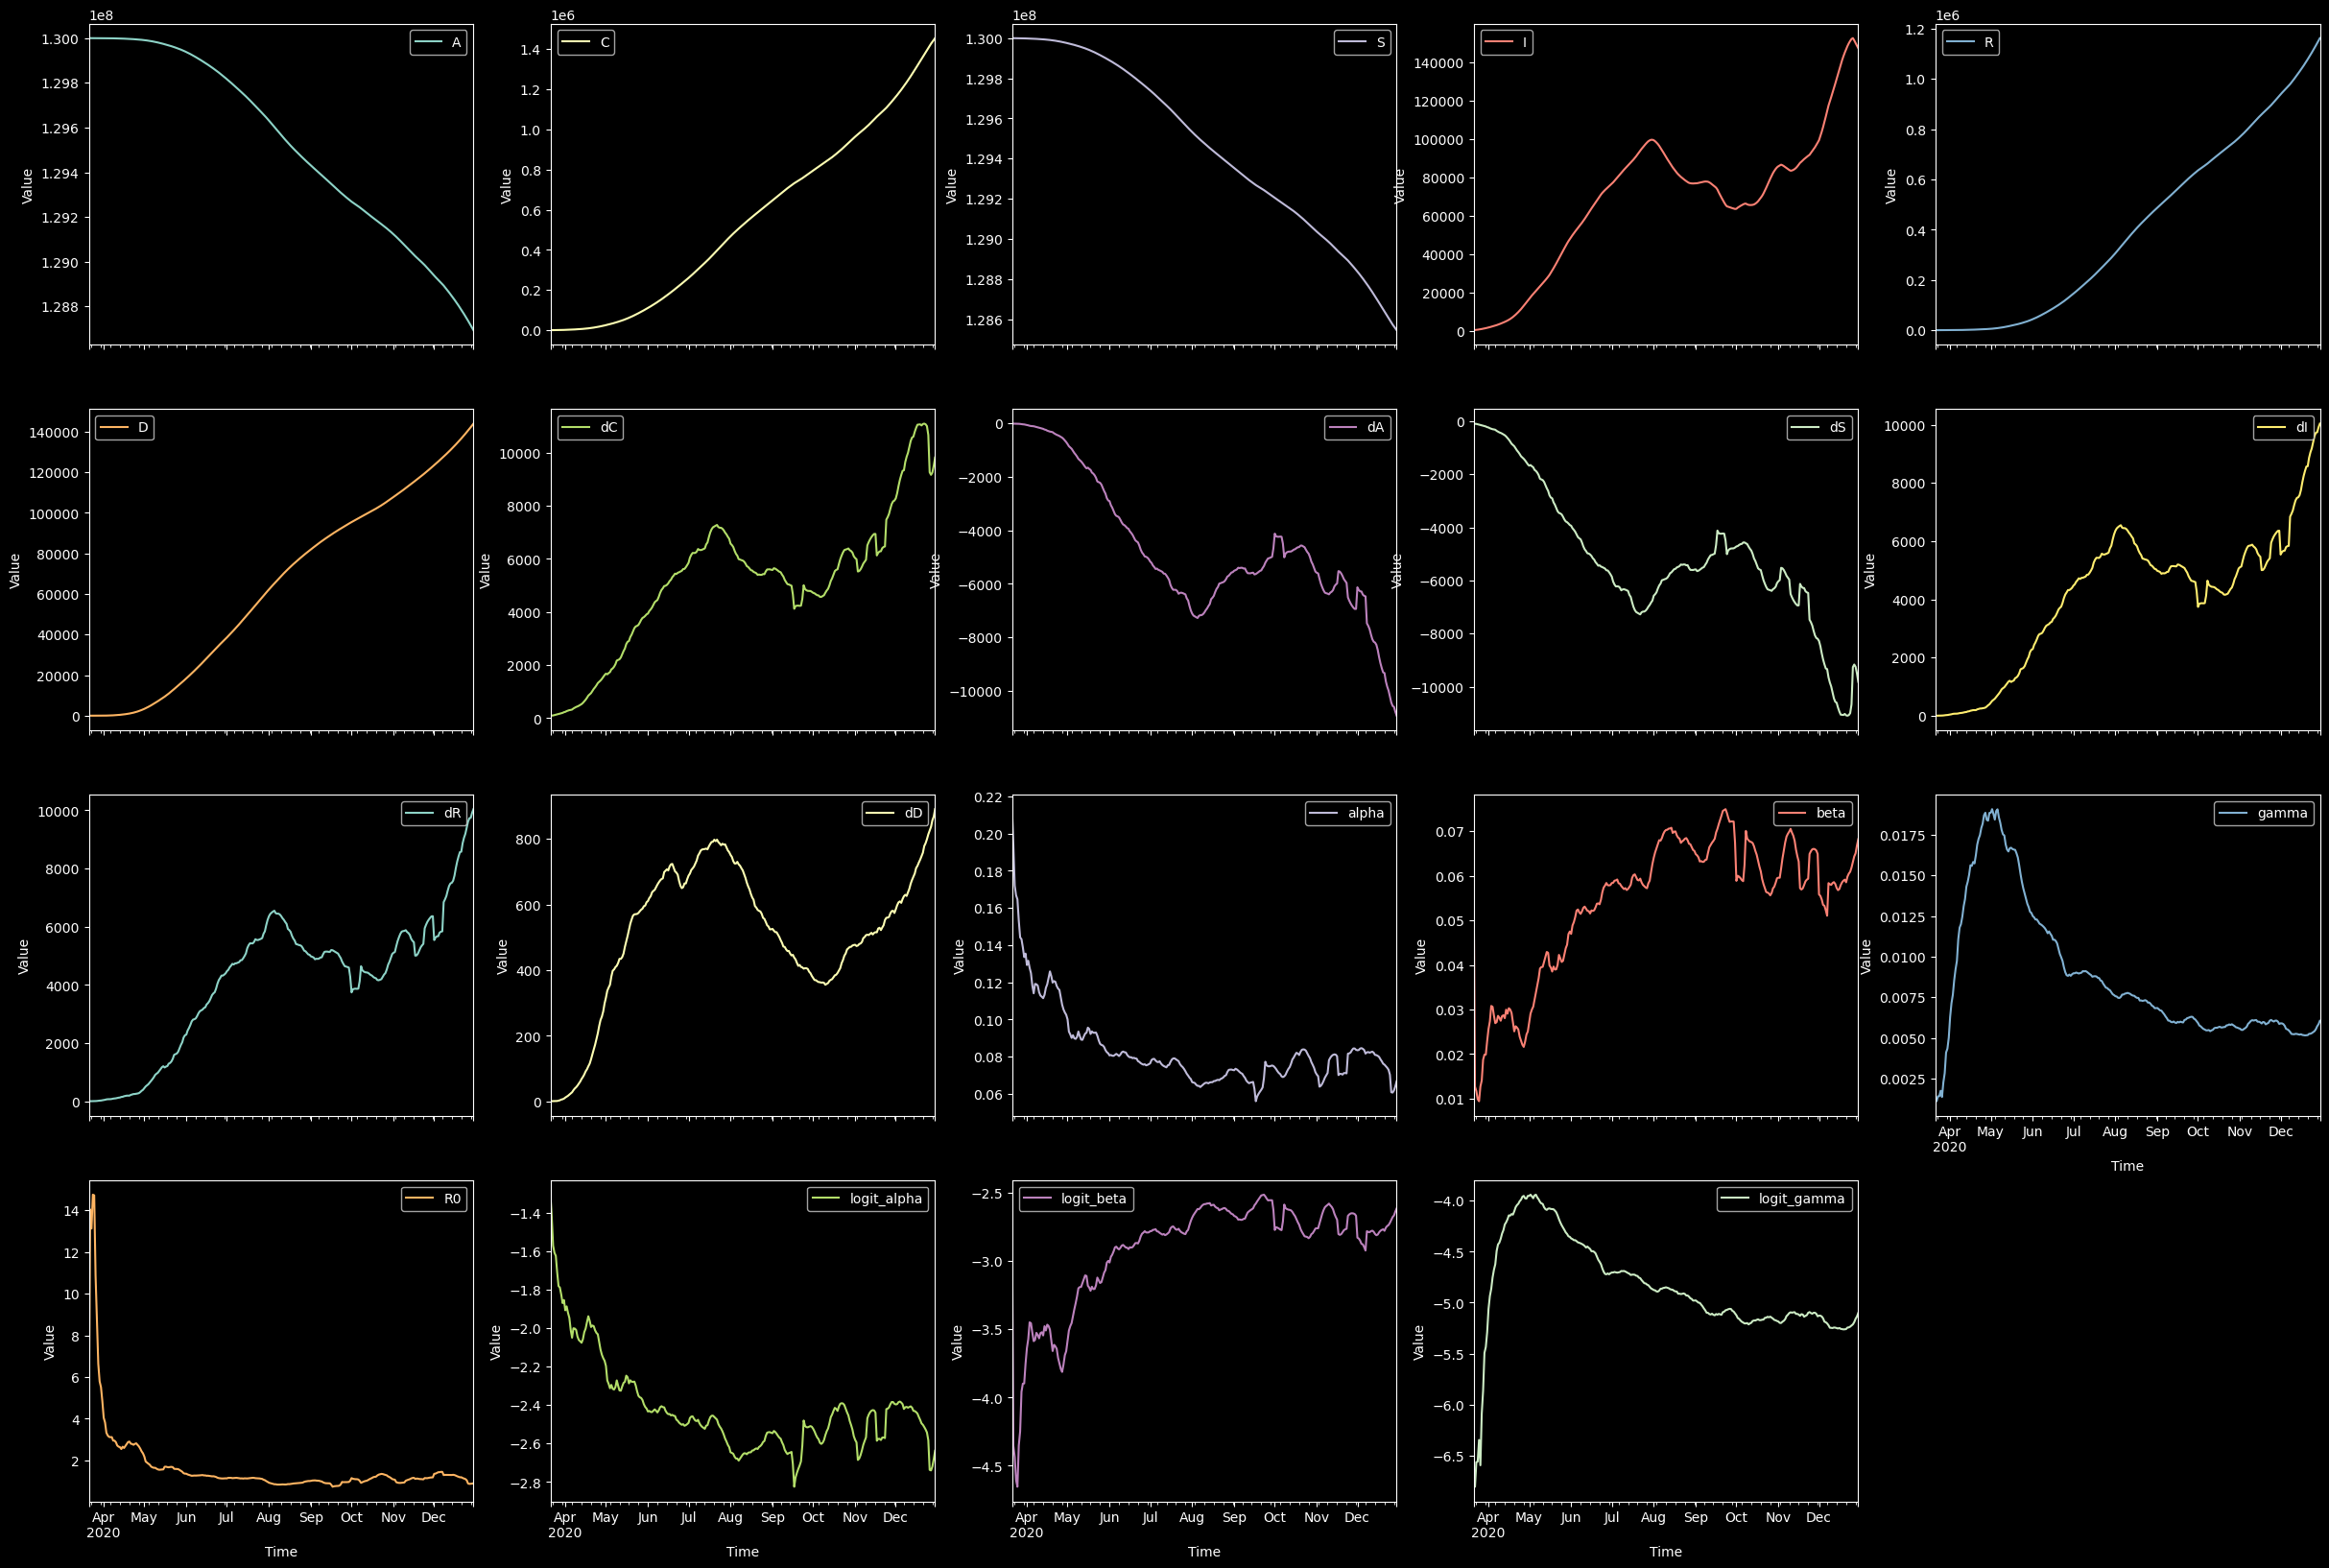

In [3]:
visualization.view_data(data)

In [5]:
cutoff = 90
y_test = data.iloc[-cutoff:]
y_train = data.iloc[:-cutoff]

In [6]:
model_fitted = modeling.fit_model(y_train)

c:\Users\julih\anaconda3\envs\epydemics\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [7]:
predicted_radii = modeling.forecasting_ratios(y_train, y_test.index, model_fitted, horizon = cutoff)

Forecasting ratios
0 alpha logit_alpha
1 beta logit_beta
2 gamma logit_gamma


In [8]:
simulations  = modeling.simulate(y_train, predicted_radii , y_test.index)

2020-10-01 00:00:00


90 90


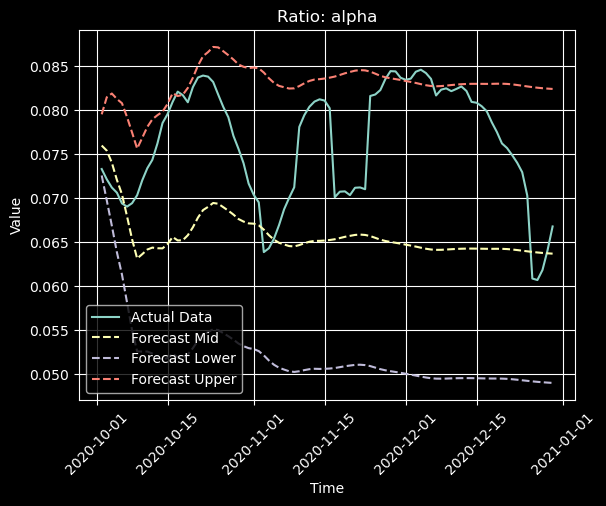

90 90


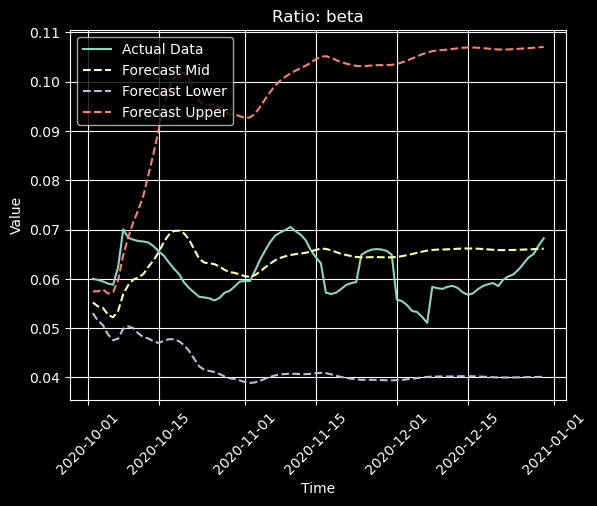

90 90


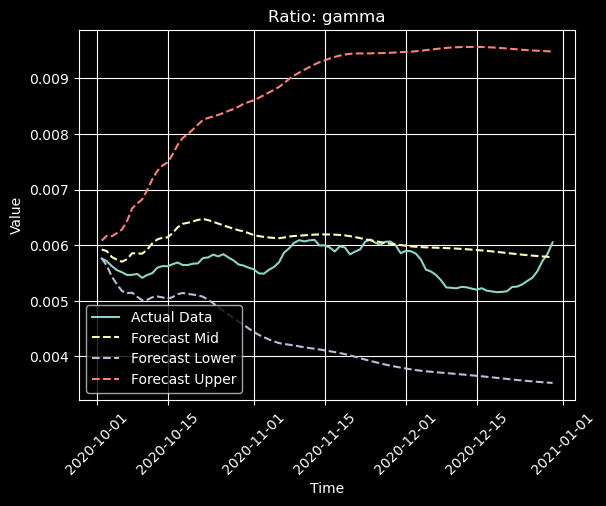

In [9]:
visualization.view_ratios(ratios, predicted_radii , y_test)

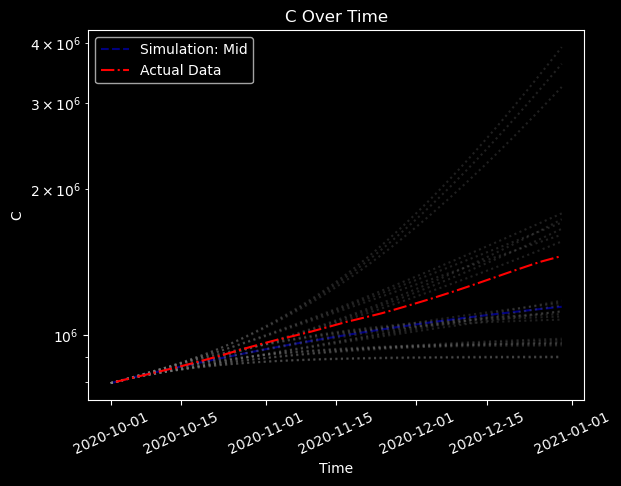

In [10]:
visualization.view_simulation(simulations, "C", y_test, logaritmic_scale=True)

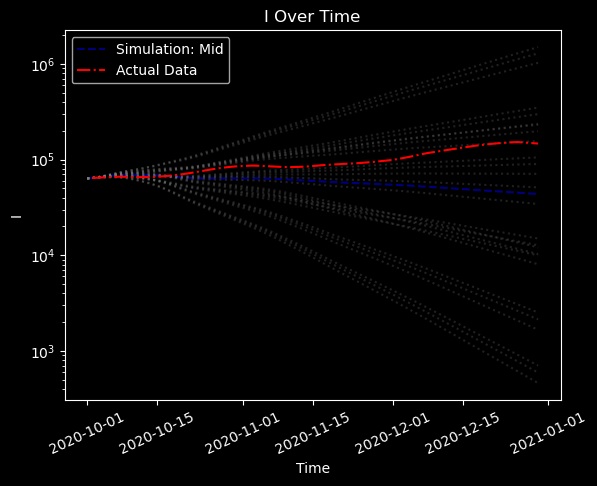

In [11]:
visualization.view_simulation(simulations, "I", y_test, logaritmic_scale=True)

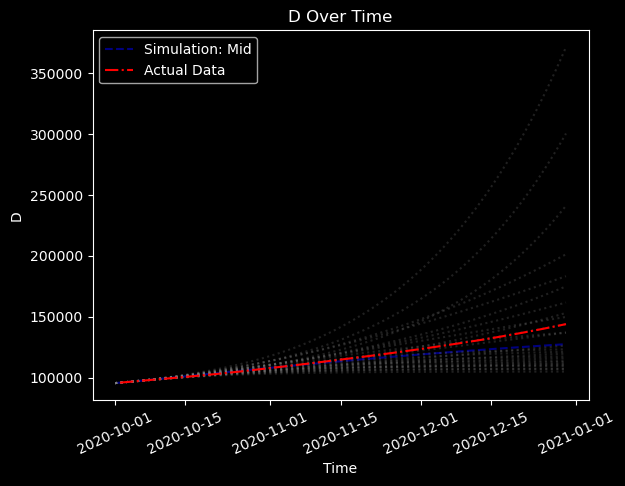

In [12]:
visualization.view_simulation(simulations, "D", y_test)


In [13]:
predicted_radii

OrderedDict([('logit_alpha',
              OrderedDict([('mid', date
                            2020-10-02   -2.498619
                            2020-10-03   -2.506914
                            2020-10-04   -2.526720
                            2020-10-05   -2.555625
                            2020-10-06   -2.580409
                                            ...   
                            2020-12-26   -2.685066
                            2020-12-27   -2.686104
                            2020-12-28   -2.686969
                            2020-12-29   -2.687695
                            2020-12-30   -2.688344
                            Name: logit_alpha-mid, Length: 90, dtype: float64),
                           ('lower',
                            date
                            2020-10-02   -2.548120
                            2020-10-03   -2.590920
                            2020-10-04   -2.636211
                            2020-10-05   -2.685751
                

In [14]:
simulation_R0 = modeling.simulate_R0(predicted_radii)

In [17]:
simulation_R0[('mid', 'mid', 'mid')]

OrderedDict([('R0',
              date
              2020-10-02    1.242540
              2020-10-03    1.249671
              2020-10-04    1.235626
              2020-10-05    1.232490
              2020-10-06    1.215993
                              ...   
              2020-12-26    0.890030
              2020-12-27    0.888775
              2020-12-28    0.887618
              2020-12-29    0.886539
              2020-12-30    0.885476
              Length: 90, dtype: float64)])

In [16]:
visualization.view_simulation(simulation_R0, "R0", predicted_radii, logaritmic_scale=False, debug=True)


('mid', 'mid', 'mid')


AttributeError: 'collections.OrderedDict' object has no attribute 'index'